# Relative Strength Index **(RSI)** as a trading strategy for cryptos
* Used to indicate over-bought or over-sold conditions in the market
* Over-bought when RSI index exceeds 80 and over-sold when RSI index dips below 20
* Can give false signals in volatile markets - should be used with other indicators <br>
*Source: https://www.investopedia.com/ask/answers/012015/how-do-i-use-relative-strength-index-rsi-create-forex-trading-strategy.asp#:~:text=The%20relative%20strength%20index%20(RSI,and%20therefore%20likely%20to%20retrace.* <br>

*Source code: https://www.youtube.com/watch?v=fxLsSax7rvY&t=97s&ab_channel=ComputerScience* 



In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [3]:
# Read the file in from device
date_cols = ['Date']
df = pd.read_csv('BTC_INR_2years_10Nov2020.csv', parse_dates=date_cols, index_col=['Date'])

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-11-10,462866.68750,466574.06250,462807.28125,464540.25000,464540.25000,268561593600
2018-11-11,464859.90625,465557.15625,461301.75000,465104.40625,465104.40625,285758394730
2018-11-12,465139.96875,467847.50000,463837.28125,464650.34375,464650.34375,313286210330
2018-11-13,464790.37500,462823.71875,458803.37500,461472.18750,461472.18750,326815269988
2018-11-14,460873.53125,460636.00000,399751.75000,415338.90625,415338.90625,535531577730


In [5]:
# Check of null values in the data
filt = df['Close'].isnull()
df[filt]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


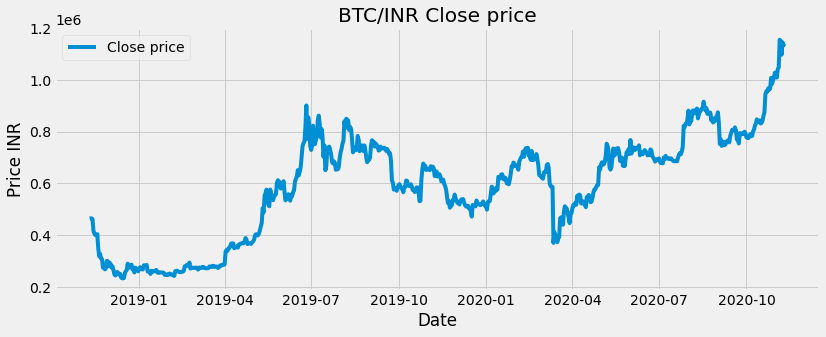

In [6]:
# Visualise
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Close'], label='Close price')
plt.legend(loc='upper left')
plt.title('BTC/INR Close price')
plt.xlabel('Date')
plt.ylabel('Price INR')
plt.show()


In [8]:
# Prepare the data to calculate the RSI

# Get the difference in price from the previous day
delta = df['Close'].diff(1)
delta

Date
2018-11-10            NaN
2018-11-11      564.15625
2018-11-12     -454.06250
2018-11-13    -3178.15625
2018-11-14   -46133.28125
                 ...     
2020-11-06    -3469.12500
2020-11-07   -54163.50000
2020-11-08    47729.12500
2020-11-09   -11209.12500
2020-11-10     5834.00000
Name: Close, Length: 732, dtype: float64

In [9]:
# Get rid of the first NaN value
delta = delta.dropna()
delta

Date
2018-11-11      564.15625
2018-11-12     -454.06250
2018-11-13    -3178.15625
2018-11-14   -46133.28125
2018-11-15    -9235.93750
                 ...     
2020-11-06    -3469.12500
2020-11-07   -54163.50000
2020-11-08    47729.12500
2020-11-09   -11209.12500
2020-11-10     5834.00000
Name: Close, Length: 731, dtype: float64

In [10]:
# Get the positive gains (up) and the negative gains (down)
up = delta.copy()
down = delta.copy()

up[up<0] = 0 # Any values that are less than 0 will be 0. Only contains positive values
down[down>0] = 0 # Any values in down that are greater than 0 will be set to 0. Only contains negative values

In [12]:
# Get the time period
period = 14

# Calculate the average gain and average loss
AVG_gain = up.rolling(window=period).mean()
AVG_loss = abs(down.rolling(window=period).mean())

In [13]:
# Calculate the Relative Strength (RS)
RS = AVG_gain/AVG_loss

# Caculate the RSI
RSI = 100.0 - (100.0/(1.0 + RS))

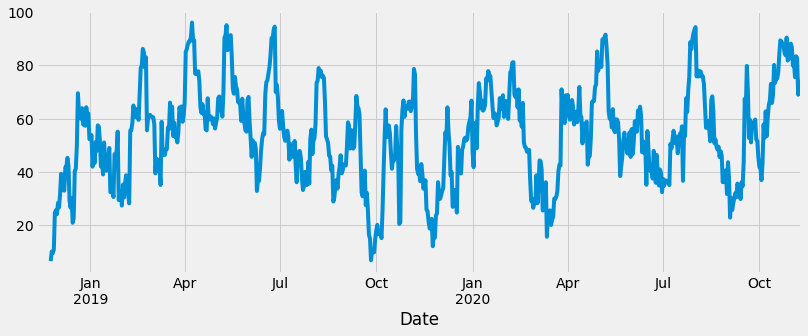

In [14]:
# Visualise the RSI

plt.figure(figsize=(12.2, 4.5))
RSI.plot()
plt.show()

In [15]:
# Create new df

new_df = pd.DataFrame()
new_df['Close'] = df['Close']
new_df['RSI'] = RSI

new_df

,Close,RSI
Date,,
2018-11-10,4.645402e+05,NaN
2018-11-11,4.651044e+05,NaN
2018-11-12,4.646503e+05,NaN
2018-11-13,4.614722e+05,NaN
2018-11-14,4.153389e+05,NaN
...,...,...
2020-11-06,1.151582e+06,82.813438
2020-11-07,1.097418e+06,69.002515
2020-11-08,1.145147e+06,73.882651


In [66]:
# # Visually show the close price and RSI

# # Plot the close price
# plt.figure(figsize=(12.2, 4.5))
# plt.plot(new_df.index, new_df['Close'], label='Close price')
# plt.title('Close price history')
# plt.legend(new_df.columns.values, loc='upper left')
# plt.ticklabel_format(style='plain', axis='y')
# plt.tight_layout()
# plt.show()

# # Plot the corresponding RSI value and significant levels
# plt.figure(figsize=(12.2, 4.5))
# plt.title('RSI plot')
# plt.plot(new_df.index, new_df['RSI'])
# plt.axhline(0, linestyle='--', alpha=0.5, color='grey')
# plt.axhline(10, linestyle='--', alpha=0.5, color='orange')
# plt.axhline(20, linestyle='--', alpha=0.5, color='green')
# plt.axhline(30, linestyle='--', alpha=0.5, color='red')
# plt.axhline(70, linestyle='--', alpha=0.5, color='red')
# plt.axhline(80, linestyle='--', alpha=0.5, color='green')
# plt.axhline(90, linestyle='--', alpha=0.5, color='orange')
# plt.axhline(100, linestyle='--', alpha=0.5, color='grey')
# # plt.subplots_adjust(left=0.01, bottom=0.1, right=1.01, top=0.8)
# plt.tight_layout()
# plt.show()

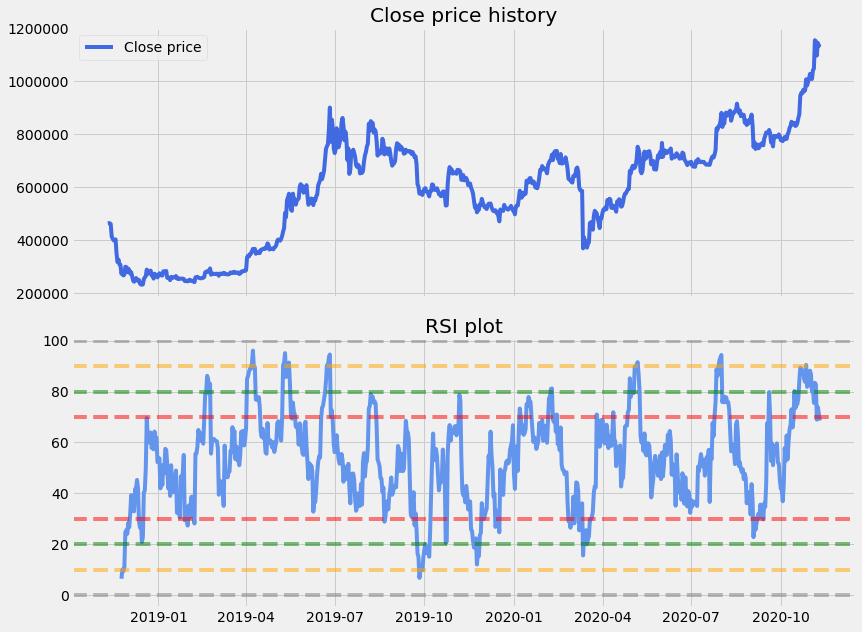

In [64]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12.2, 9))

ax1.plot(new_df.index, new_df['Close'], label='Close price', color='royalblue')
ax1.set_title('Close price history')
ax1.legend(loc='upper left')
ax1.ticklabel_format(style='plain', axis='y')

ax2.set_title('RSI plot')
ax2.plot(new_df.index, new_df['RSI'], color='cornflowerblue')
ax2.axhline(0, linestyle='--', alpha=0.5, color='grey')
ax2.axhline(10, linestyle='--', alpha=0.5, color='orange')
ax2.axhline(20, linestyle='--', alpha=0.5, color='green')
ax2.axhline(30, linestyle='--', alpha=0.5, color='red')
ax2.axhline(70, linestyle='--', alpha=0.5, color='red')
ax2.axhline(80, linestyle='--', alpha=0.5, color='green')
ax2.axhline(90, linestyle='--', alpha=0.5, color='orange')
ax2.axhline(100, linestyle='--', alpha=0.5, color='grey')

plt.tight_layout()
plt.show()
